# Factor Analysis Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AAPL','MSFT','AMD','NVDA']
start = '2012-01-01'
end = '2019-09-11'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
df.head()

,AAPL,MSFT,AMD,NVDA
Date,,,,
2012-01-03,51.269413,22.156071,5.48,12.939396
2012-01-04,51.544937,22.677486,5.46,13.086854
2012-01-05,52.117188,22.909233,5.46,13.556875
2012-01-06,52.662014,23.265116,5.43,13.400198
2012-01-09,52.578468,22.958887,5.59,13.400198


In [5]:
df.tail()

,AAPL,MSFT,AMD,NVDA
Date,,,,
2019-09-05,213.279999,140.050003,31.500000,179.740005
2019-09-06,213.259995,139.100006,30.559999,178.649994
2019-09-09,214.169998,137.520004,30.500000,180.500000
2019-09-10,216.699997,136.080002,30.230000,183.179993
2019-09-11,223.589996,136.119995,29.760000,184.330002


In [6]:
from factor_analyzer import FactorAnalyzer

In [7]:
fa = FactorAnalyzer(rotation=None)

In [8]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)

In [9]:
fa.get_communalities()

array([0.97268878, 0.99475467, 0.87073182, 0.86050823])

In [20]:
ev, v = fa.get_eigenvalues()
ev

array([3.64585553, 0.23044865, 0.09047303, 0.03322279])

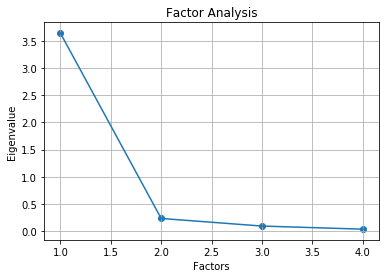

In [21]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(11558.982758095883, 0.0)

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [12]:
kmo_model

0.7960086410757489

In [13]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,              ModelSpecificationParser)

In [14]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df)

In [15]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

In [16]:
cfa.fit(df.values)

ConfirmatoryFactorAnalyzer(bounds=None, disp=False, impute='median',
              is_cov_matrix=False, max_iter=200, n_obs=1935,
              specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x0000018224B65278>,
              tol=None)

In [17]:
cfa.loadings_

array([[1.46526724, 1.46526736, 1.46526718, 1.4652684 ],
       [0.88884701, 0.8888463 , 0.88884723, 0.88884605],
       [0.09607419, 0.0960753 , 0.09607442, 0.09607403],
       [2.36864499, 2.36864292, 2.36864517, 2.36864525]])

In [18]:
cfa.factor_varcovs_

array([[1.        , 6.91758045, 6.91758839, 6.91752822],
       [6.91758045, 1.        , 6.91775377, 6.91769158],
       [6.91758839, 6.91775377, 1.        , 6.91771481],
       [6.91752822, 6.91769158, 6.91771481, 1.        ]])

In [19]:
cfa.transform(df.values)

array([[  3717151.62284127,  -5538394.40105194,   3989013.91270873,
         -2167807.78566406],
       [  3751308.29182493,  -5503202.49454121,   4067244.67896649,
         -2315386.93769271],
       [  3701409.57386969,  -5455250.20980751,   4000948.68926051,
         -2247144.2377661 ],
       ...,
       [ -4851642.58724023,  19844473.81027293,    886569.48048959,
        -15879331.92596557],
       [ -5337722.68804131,  19714846.10185819,    -47453.6896819 ,
        -14329600.22115603],
       [ -6654899.711953  ,  20658818.77332188,  -1952900.25663411,
        -12050947.44646332]])